This notebook is where I run tests or prepare the datasets.

In [1]:
import data_prep
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
from dc_transformation import DCTransformer

executor = ThreadPoolExecutor()

print(executor._max_workers)

28


In [2]:
from copy import copy

d = {}
with open('datasets/m4_daily_micro.json') as file:
    d = json.load(file)

test = {}


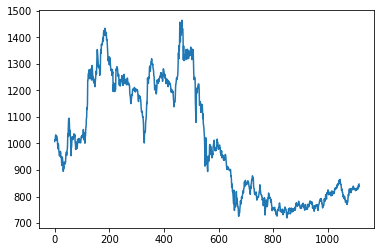

In [3]:
plt.plot(d['573'])

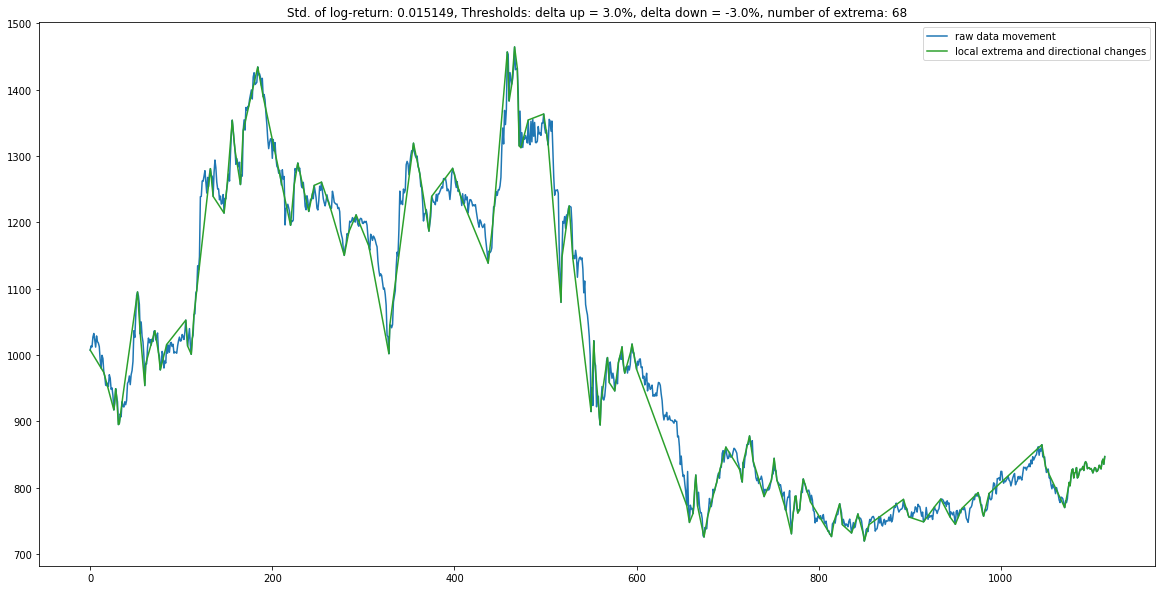

In [12]:
t1 = DCTransformer()
t1.transform(d['573'], threshold=(0.03, -0.03), kind='linear')
t1.make_plot()

/home/yukuan.lin/Desktop/DCTransformation/DCLaboratory01/dc_transformation.py:234: RuntimeWarning: divide by zero encountered in log
  self.sigma = round(np.std(np.diff(np.log(self.data))), 6)  # standard deviation of log-return
/home/yukuan.lin/Desktop/DCTransformation/DCLaboratory01/dc_transformation.py:234: RuntimeWarning: invalid value encountered in log
  self.sigma = round(np.std(np.diff(np.log(self.data))), 6)  # standard deviation of log-return


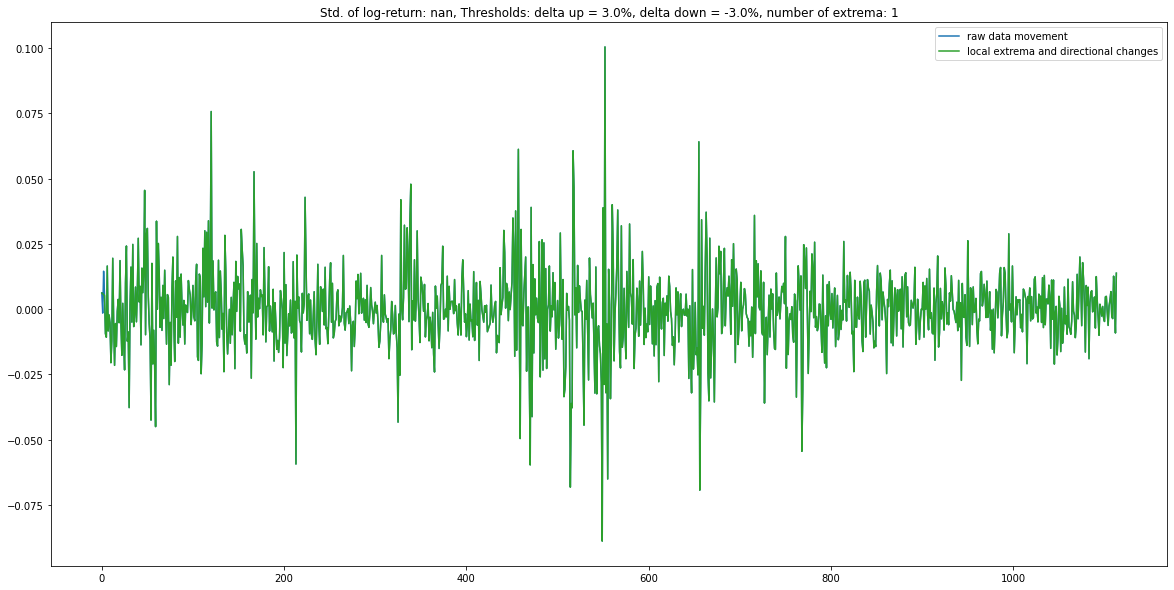

In [5]:
tr = np.diff(np.log(d['573']))

t2 = DCTransformer()
t2.transform(tr, threshold=(0.03, -0.03), kind='linear')
t2.make_plot()

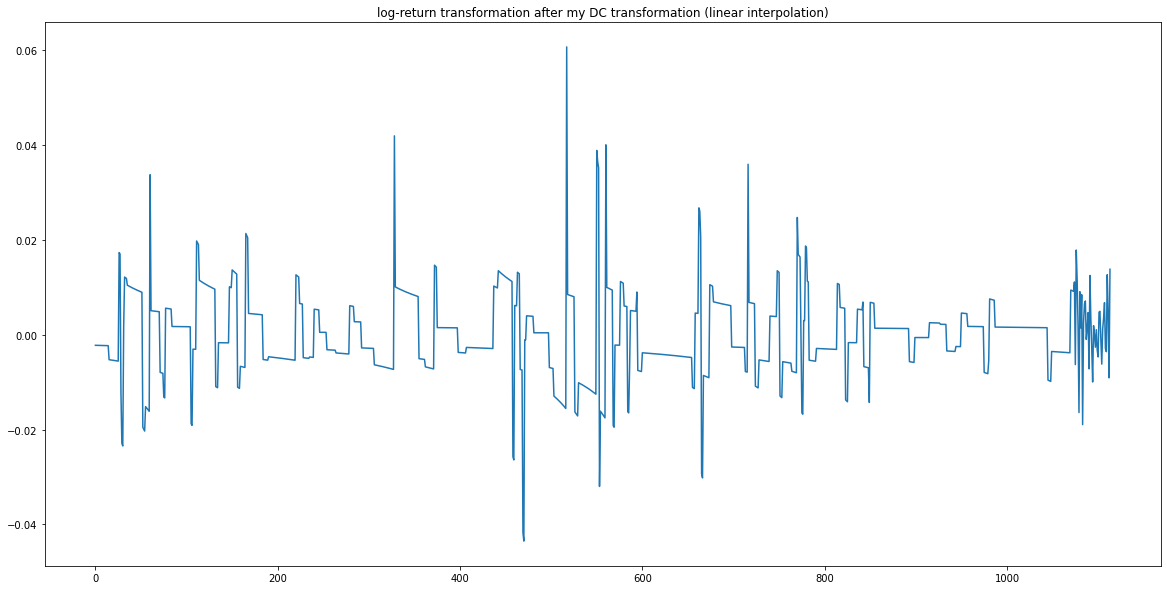

In [14]:
tr2 = np.diff(np.log(t1.tdata1))
plt.figure(figsize=(20, 10))
plt.plot(tr2)
plt.title('log-return transformation after my DC transformation (linear interpolation)')
plt.show()

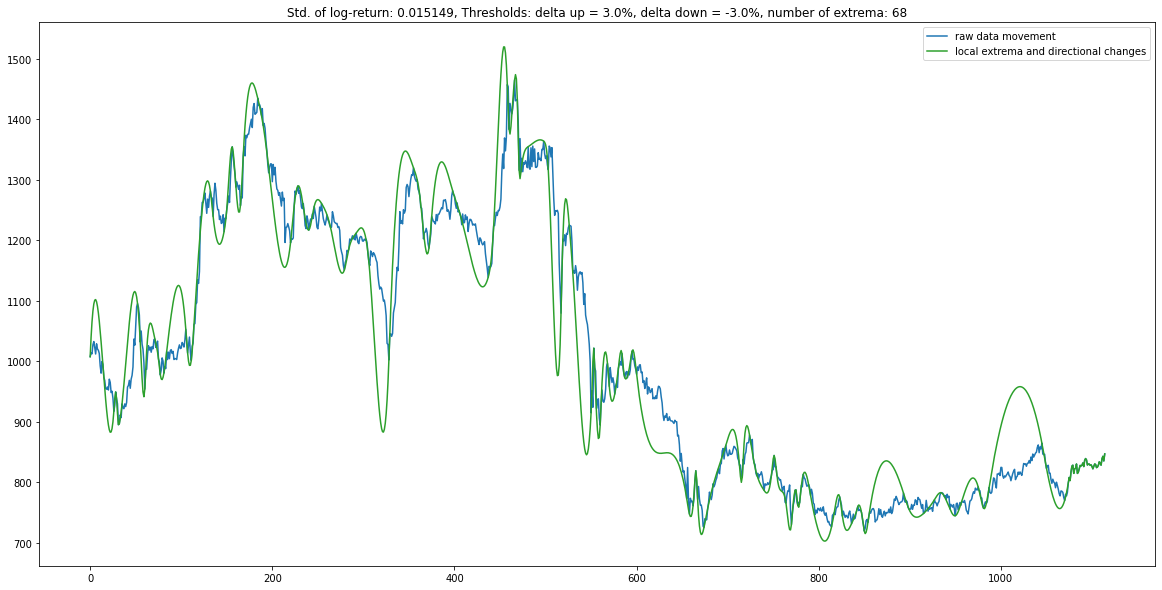

In [15]:
t3 = DCTransformer()
t3.transform(d['573'], threshold=(0.03,-0.03), kind='cubic')
t3.make_plot()

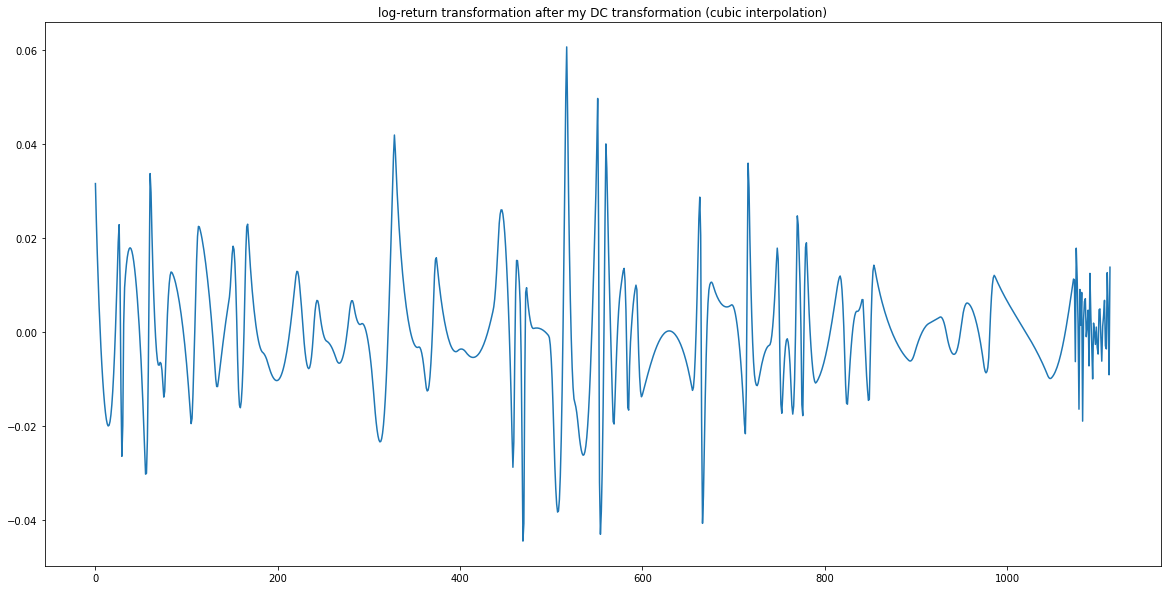

In [16]:
tr3 = np.diff(np.log(t3.tdata1))
plt.figure(figsize=(20, 10))
plt.plot(tr3)
plt.title('log-return transformation after my DC transformation (cubic interpolation)')
plt.show()

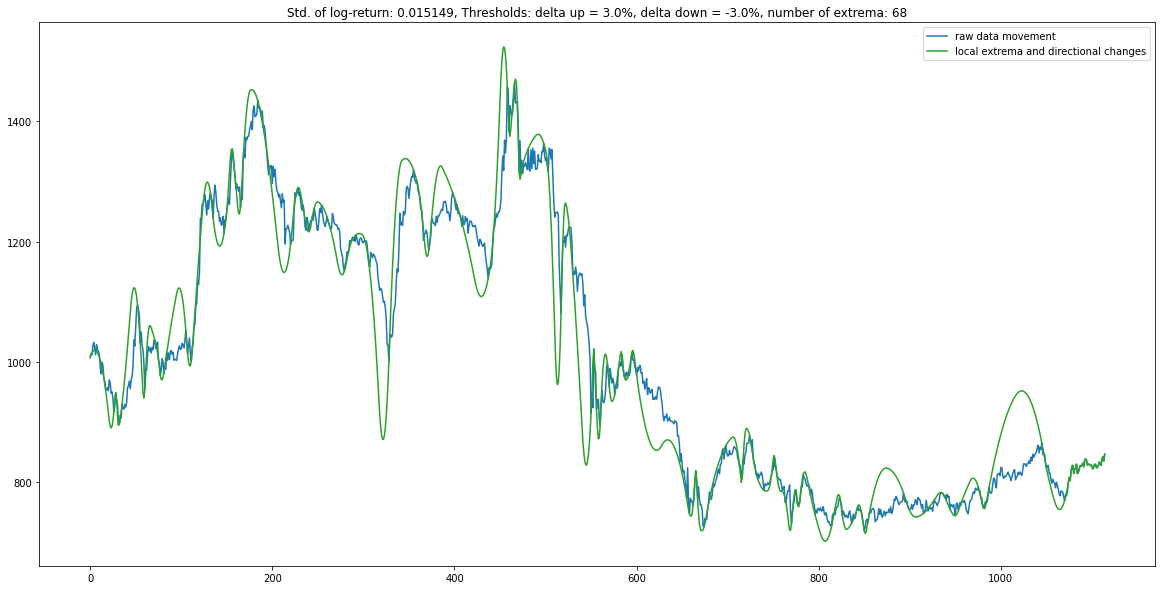

In [18]:
t4 = DCTransformer()
t4.transform(d['573'], threshold=(0.03,-0.03), kind='quadratic')
t4.make_plot()

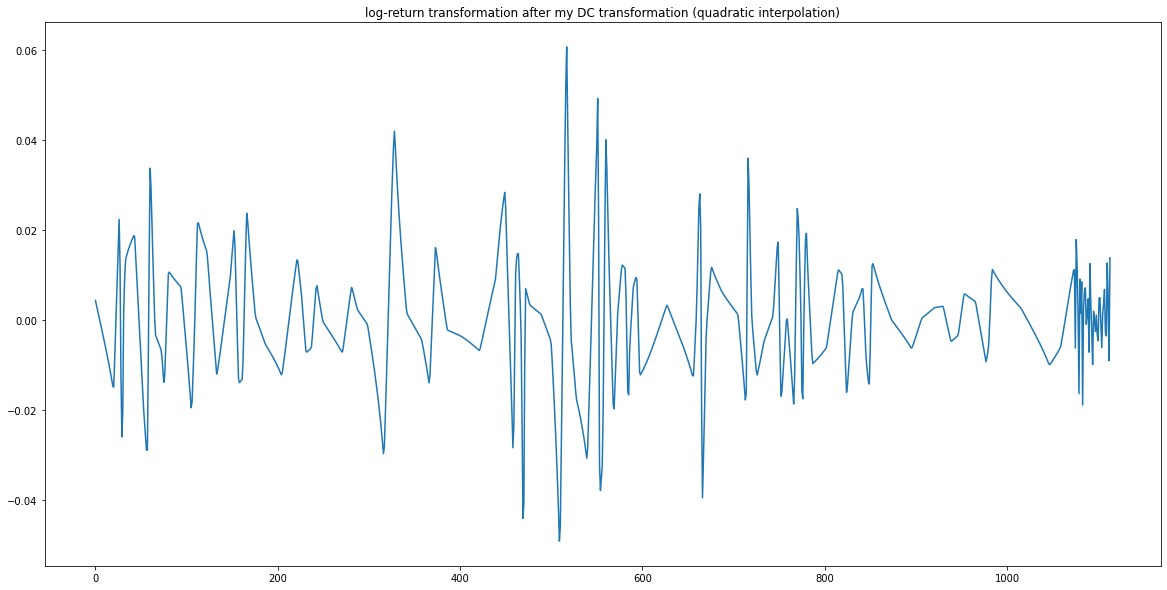

In [20]:
tr4 = np.diff(np.log(t4.tdata1))
plt.figure(figsize=(20, 10))
plt.plot(tr4)
plt.title('log-return transformation after my DC transformation (quadratic interpolation)')
plt.show()

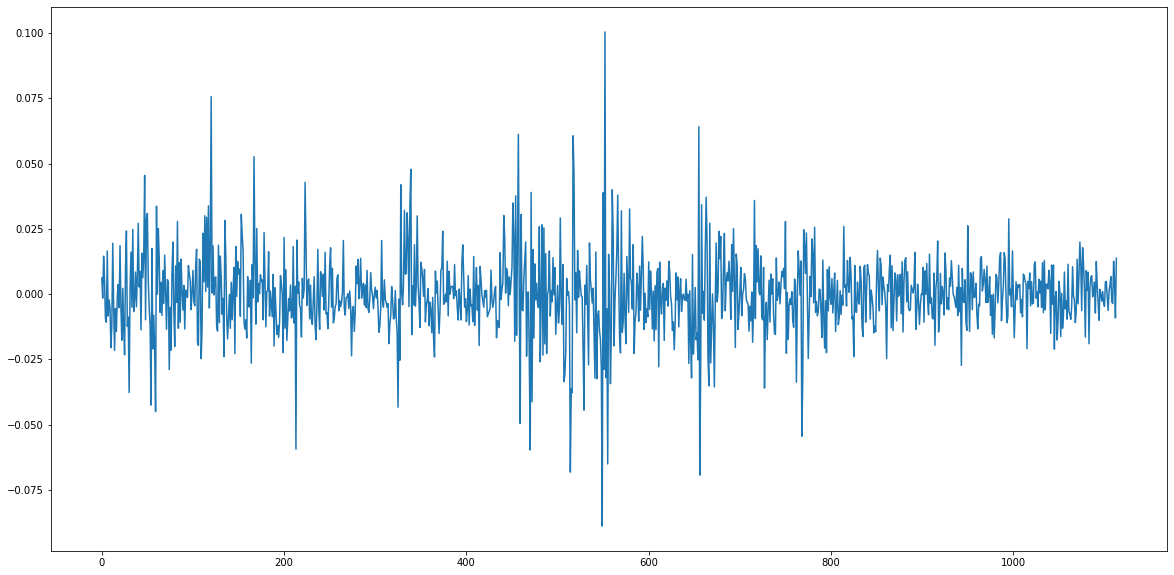

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(tr)
plt.show()

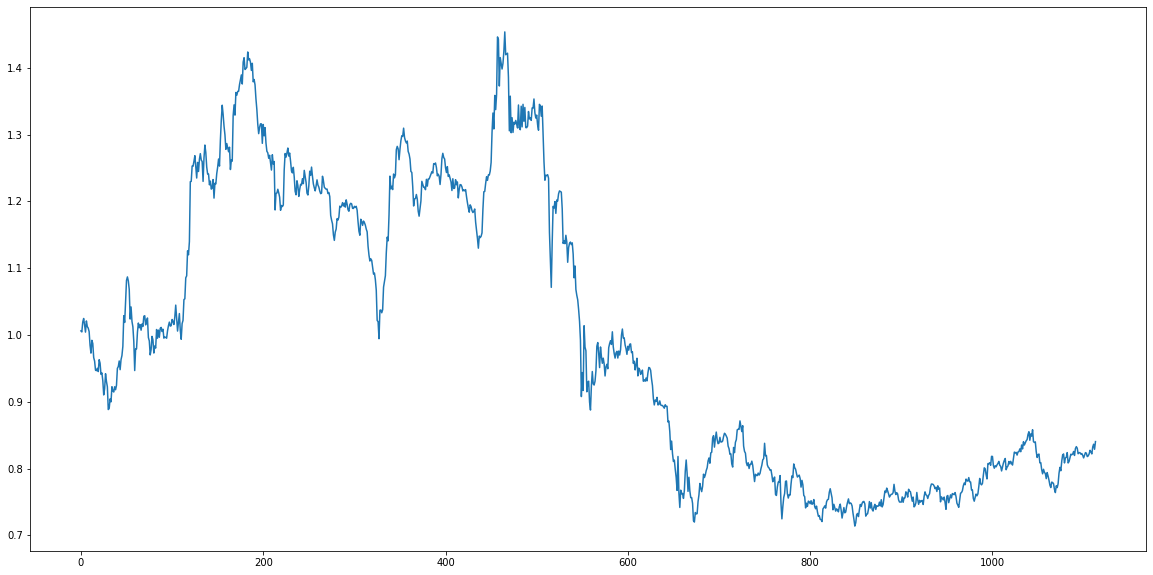

In [22]:
back = np.exp(np.cumsum(tr))
plt.figure(figsize=(20, 10))
plt.plot(back)
plt.show()

In [24]:
print(len(tr), len(back), len(d['573']))

1114 1114 1115


In [28]:
l = [1,2,3]
print(l + [4])

[1, 2, 3, 4]


In [26]:
tr_lst = tr.tolist()
trr = [tr_lst[0]] + tr_lst

backk = np.exp(np.cumsum(trr))
print(len(trr), len(backk), len(d['573']))

1115 1115 1115


In [7]:
with open('test.json', 'x') as file:
    test['573'] = copy(d['573'])
    test['600'] = copy(d['600'])
    json.dump(test, file)

# Get datasets differentiated by category

In [1]:
df = pd.read_csv(f'datasets/m4_info.csv')
df

NameError: name 'pd' is not defined

In [20]:
m4_daily_micro_ind = []

for entry in df.values:
    if 'D' in entry[0] and entry[1] == 'Micro':
        ind = entry[0][1:]
        m4_daily_micro_ind.append(int(ind))

In [21]:
len(m4_daily_micro_ind)

1476

In [6]:
with open(f'datasets/m4_daily_dataset.json') as file:
    m4_daily = json.load(file)


In [22]:
m4_daily_micro_ind

[128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294

In [23]:
m4_daily_micro = {
    k: m4_daily[str(k)] for k in m4_daily_micro_ind
}

In [24]:
print(list(m4_daily_micro.keys()))

[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,

In [35]:
min_len = 1000
max_len = 1500
lens= []
count = 0
pick = 20
sub = {}
for k, v in m4_daily_micro.items():
    if count > pick: break
    l = len(v)
    if l >= min_len and l <= max_len:
        sub[k] = v
        lens.append(l)
        count += 1

print(np.mean(lens))

1188.3333333333333


: 

In [30]:
len(sub)

27

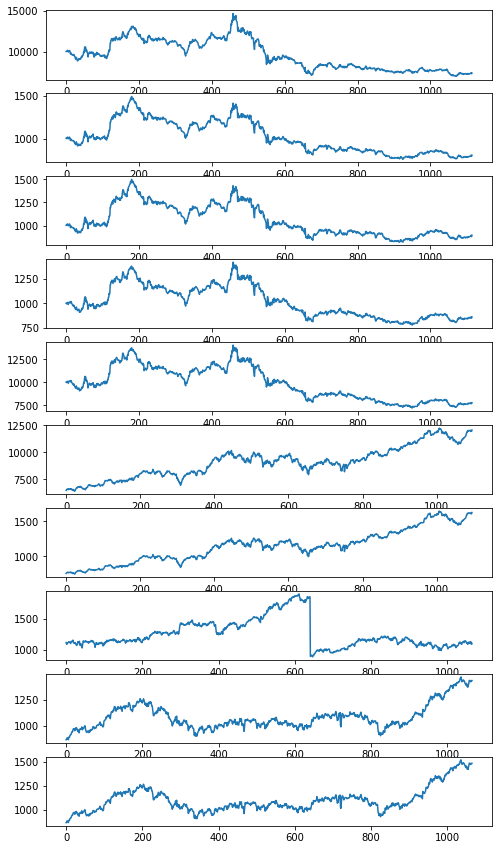

In [32]:

seg = 1

fig, axs = plt.subplots(nrows=10, ncols = 1, figsize = (8, 15))

for i, k in enumerate(sub.keys()):
    flag = (seg * 10, (seg+1)*10)
    if i >= flag[0] and i < flag[1]:
        axs[i-seg*10].plot(sub[k])

plt.show()

In [33]:
import json

with open('datasets/m4_daily_micro.json', 'x') as file:
    json.dump(m4_daily_micro, file)

In [34]:
from sktime.forecasting.ets import AutoETS

train_x = list(sub[2041][:10])
train_x1 = list(sub[2041][:11])

In [35]:
autoets = AutoETS(auto=True)
autoets.fit(pd.Series(train_x))
autoets.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                       ETS(AAN)   Log Likelihood                 -29.574
Date:                Wed, 06 Jul 2022   AIC                             69.148
Time:                        15:20:20   BIC                             70.660
Sample:                             0   HQIC                            67.488
                                 - 10   Scale                           21.690
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0001        nan        nan        nan         nan         nan
smoothing_trend      1e-08      0.213    4.7e-08      1.000      -0.417       0.417
initial_level    1090.2870      4.704    231.799      0.000    1081.068    1099.506
initial_trend       1.2613      0.597      2.114      0.035       0.092       2.431
===================================================================================
Ljung-Box (Q):                        2.49   Jarque-Bera (JB):                 2.39
Prob(Q):                              0.29   Prob(JB):                         0.30
Heteroskedasticity (H):               1.01   Skew:                            -1.14
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [36]:
float(autoets.predict(1))

1104.1611182254296

In [37]:
autoets.update(pd.Series(train_x1[-1], index=[len(train_x1)-1]))
autoets.summary()

/home/yukuan.lin/Desktop/DCTransformation/dclab01/lib/python3.8/site-packages/sktime/forecasting/base/_base.py:1640: UserWarning: NotImplementedWarning: AutoETS does not have a custom `update` method implemented. AutoETS will be refit each time `update` is called with update_params=True.
  warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:                       ETS(AAN)   Log Likelihood                 -32.186
Date:                Wed, 06 Jul 2022   AIC                             74.372
Time:                        15:20:20   BIC                             76.361
Sample:                             0   HQIC                            73.118
                                 - 11   Scale                           20.371
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0001        nan        nan        nan         nan         nan
smoothing_trend      1e-08      0.200   5.01e-08      1.000      -0.391       0.391
initial_level    1090.8776      4.053    269.160      0.000    1082.934    1098.821
initial_trend       1.1137      0.562      1.980      0.048       0.012       2.216
===================================================================================
Ljung-Box (Q):                        2.54   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.28   Prob(JB):                         0.28
Heteroskedasticity (H):               0.30   Skew:                            -1.09
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [38]:
autoets.predict(1)

11    1104.242094
dtype: float64

In [39]:
from dc_transformation import DCTransformer

In [40]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
train_x = sub[2040]

ets2 = ETSModel(train_x[:100])
ets2_fit = ets2.fit()
ets2_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10325D+00    |proj g|=  8.99900D-01

At iterate    1    f=  5.38995D+00    |proj g|=  3.29162D-04

At iterate    2    f=  5.38414D+00    |proj g|=  2.62282D-04

At iterate    3    f=  5.37451D+00    |proj g|=  1.50992D-05

At iterate    4    f=  5.37448D+00    |proj g|=  2.66456D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     14      5     0     1   2.665D-07   5.374D+00
  F =   5.3744808747959985     

CONVERG

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                       ETS(ANN)   Log Likelihood                -537.448
Date:                Wed, 06 Jul 2022   AIC                           1080.896
Time:                        15:20:20   BIC                           1088.712
Sample:                             0   HQIC                          1084.059
                                - 100   Scale                         2727.347
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.108      9.259      0.000       0.788       1.212
initial_level    6097.4029     52.358    116.455      0.000    5994.782    6200.023
===================================================================================
Ljung-Box (Q):                        0.52   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.77   Prob(JB):                         0.28
Heteroskedasticity (H):               0.73   Skew:                            -0.14
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [41]:
ets2_fit.forecast(1)

array([6489.65054224])

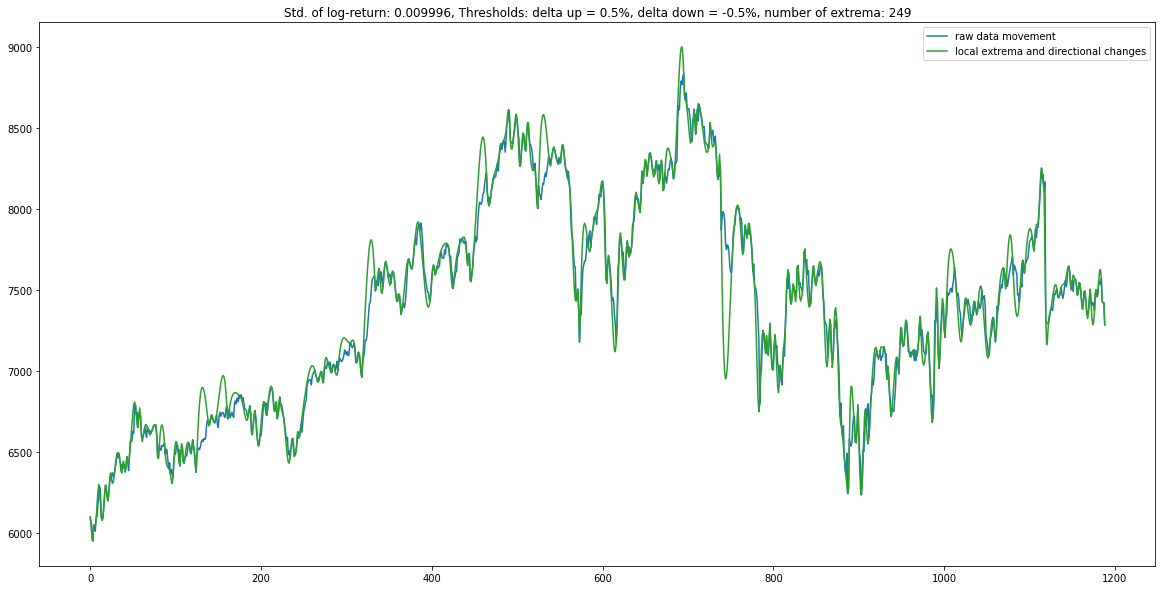

In [42]:
from dc_transformation import DCTransformer

t = DCTransformer()

t.transform(sub[2040], threshold=(0.005, -0.005), kind='cubic')
t.make_plot()

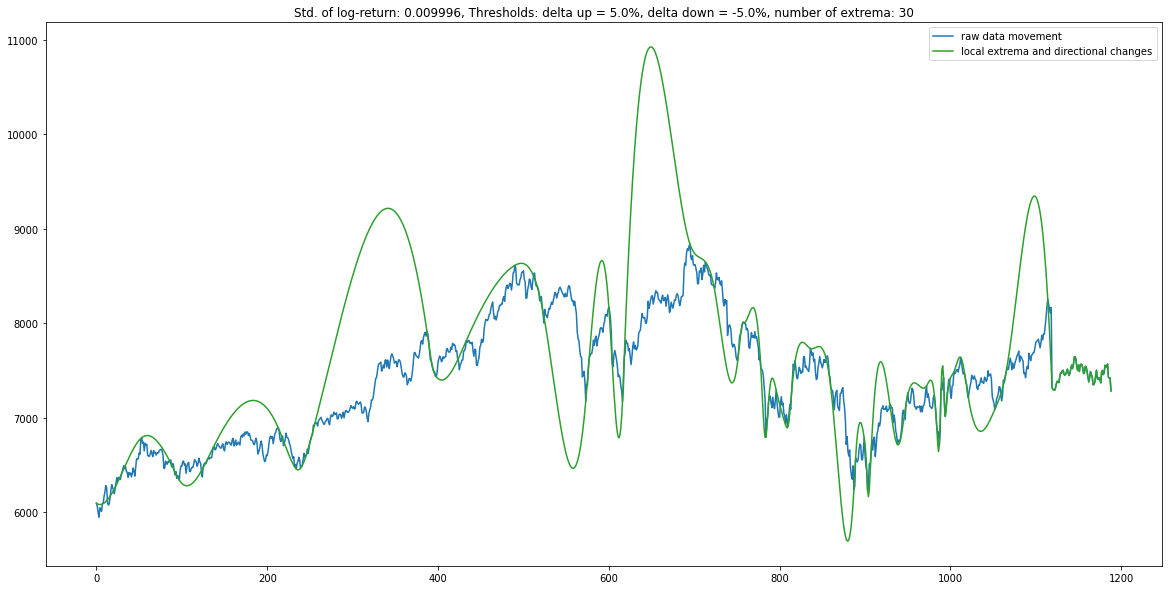

In [43]:
t3 = DCTransformer()
t3.transform(sub[2040], threshold=(0.05, -0.05), kind='splrep')
t3.make_plot()

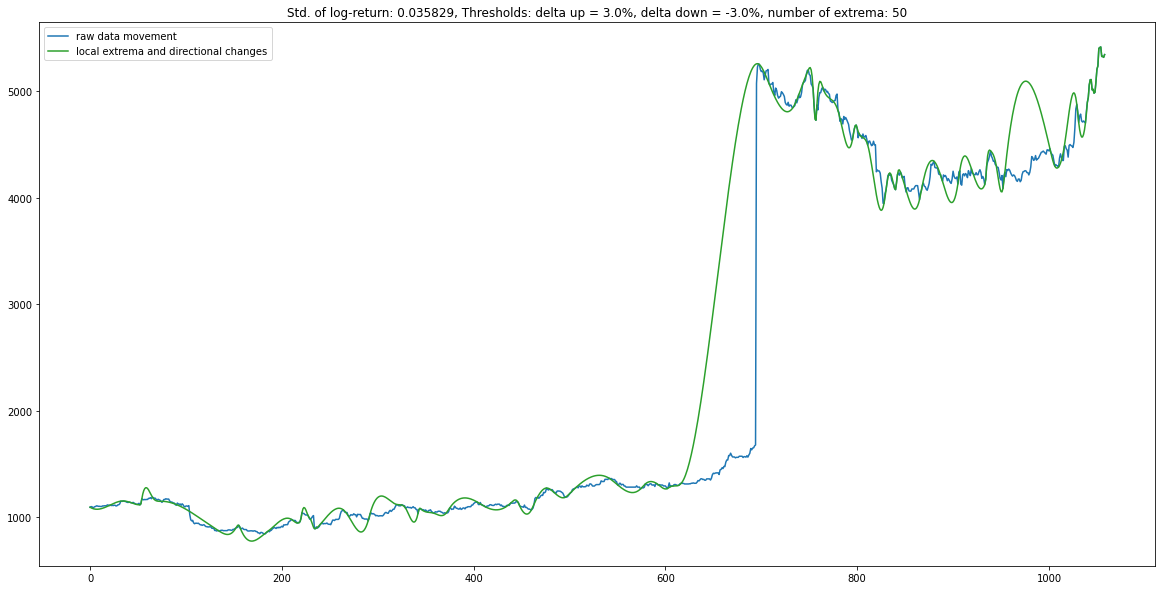

In [44]:
t4 = DCTransformer()
t4.transform(sub[2041], threshold=(0.03, -0.03), kind='cubic')
t4.make_plot()

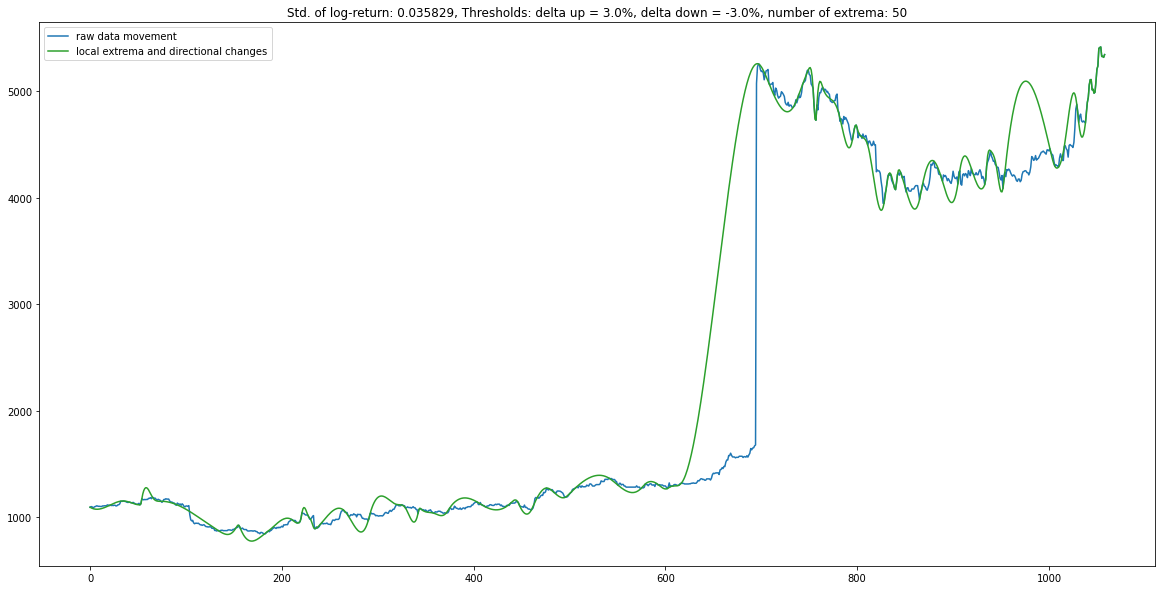

In [45]:
t5 = DCTransformer()
t5.transform(sub[2041], threshold=(0.03, -0.03), kind='splrep')
t5.make_plot()

In [46]:
list(t5.STATUS_CODE.keys())

[3, 0, 1, 2, 10, -1, -2, -10]

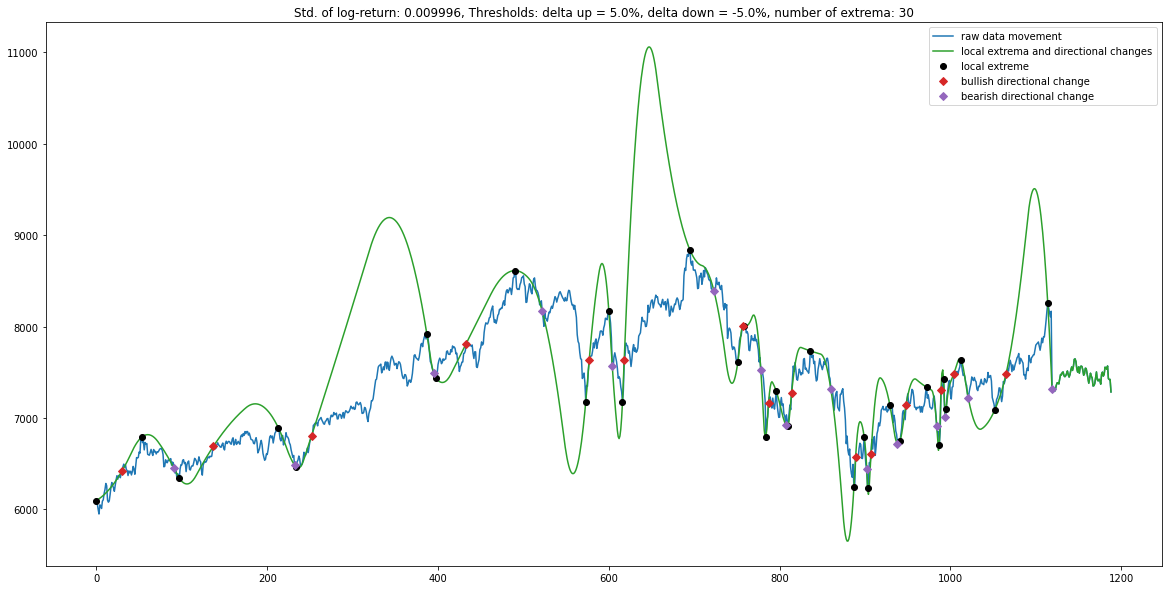

In [79]:
t2 = DCTransformer()
t2.transform(sub[2040], threshold=(0.05, -0.05), kind='quadratic')
t2.make_plot(marks=True)

In [48]:
len(t2.tdata1)

1189

In [49]:
len(t2.status)

1189

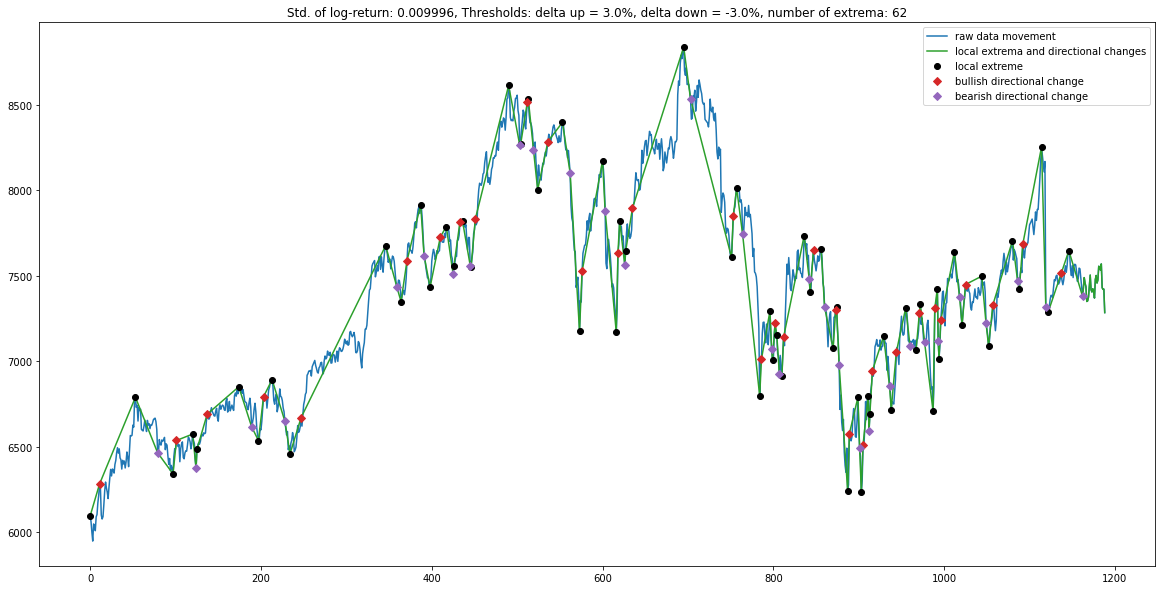

In [80]:
t1 = DCTransformer()
t1.transform(sub[2040], threshold=(0.03, -0.03), kind='linear')
t1.make_plot(marks=True)

In [51]:
from itertools import product
t = [1, 2, 3]
k = ['1', '2']
k1 = ['1']

tt = list(product(t, t, k))

In [52]:
m = {
    'a': 1,
    'b': 2
}

list(product(tt, *m))

[((1, 1, '1'), 'a', 'b'),
 ((1, 1, '2'), 'a', 'b'),
 ((1, 2, '1'), 'a', 'b'),
 ((1, 2, '2'), 'a', 'b'),
 ((1, 3, '1'), 'a', 'b'),
 ((1, 3, '2'), 'a', 'b'),
 ((2, 1, '1'), 'a', 'b'),
 ((2, 1, '2'), 'a', 'b'),
 ((2, 2, '1'), 'a', 'b'),
 ((2, 2, '2'), 'a', 'b'),
 ((2, 3, '1'), 'a', 'b'),
 ((2, 3, '2'), 'a', 'b'),
 ((3, 1, '1'), 'a', 'b'),
 ((3, 1, '2'), 'a', 'b'),
 ((3, 2, '1'), 'a', 'b'),
 ((3, 2, '2'), 'a', 'b'),
 ((3, 3, '1'), 'a', 'b'),
 ((3, 3, '2'), 'a', 'b')]

In [53]:
ets2_fit.update([100])

AttributeError: 'ETSResults' object has no attribute 'update'

In [ ]:
ets2_fit2 = ets2.fit()
ets2_fit2.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10325D+00    |proj g|=  8.99900D-01

At iterate    1    f=  5.38995D+00    |proj g|=  3.29162D-04

At iterate    2    f=  5.38414D+00    |proj g|=  2.62282D-04

At iterate    3    f=  5.37451D+00    |proj g|=  1.50992D-05

At iterate    4    f=  5.37448D+00    |proj g|=  2.66456D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     14      5     0     1   2.665D-07   5.374D+00
  F =   5.3744808747959985     

CONVERG

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                       ETS(ANN)   Log Likelihood                -537.448
Date:                Tue, 05 Jul 2022   AIC                           1080.896
Time:                        16:51:34   BIC                           1088.712
Sample:                             0   HQIC                          1084.059
                                - 100   Scale                         2727.347
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.108      9.259      0.000       0.788       1.212
initial_level    6097.4029     52.358    116.455      0.000    5994.782    6200.023
===================================================================================
Ljung-Box (Q):                        0.52   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.77   Prob(JB):                         0.28
Heteroskedasticity (H):               0.73   Skew:                            -0.14
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
train_x = sub[2040]

ets = ExponentialSmoothing(train_x[:100])
ets_fit = ets.fit()
y1 = ets_fit.forecast(1).tolist()[0]
print(y1)

6489.655046268721


In [ ]:
ets_fit.summary()

Dep. Variable:,endog,No. Observations:,100
Model:,ExponentialSmoothing,SSE,272733.776
Optimized:,True,AIC,795.108
Trend:,None,BIC,800.318
Seasonal:,None,AICC,795.529
Seasonal Periods:,None,Date:,"Tue, 05 Jul 2022"
Box-Cox:,False,Time:,16:36:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,6097.4853,l.0,True


In [ ]:
ets.append(100)

AttributeError: 'ExponentialSmoothing' object has no attribute 'append'

In [ ]:
ets_fit.params

{'smoothing_level': 0.9999999850948766,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 6097.485278631869,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
ets_update = ExponentialSmoothing(sub[2040][:101])
ets_update.fix_params(**ets_fit.params)

ets_update.summary()

TypeError: fix_params() got an unexpected keyword argument 'smoothing_level'

In [ ]:
ets.endog = np.append(ets.endog, [100])

In [ ]:
ets.endog

array([6097.48496223, 6062.79419878, 6001.53934964, 5949.67673299,
       6049.67898071, 6042.76500209, 6010.33509116, 6090.84945009,
       6105.18602717, 6173.84431068, 6217.49474361, 6283.8541232 ,
       6259.08896899, 6101.45831197, 6078.81195501, 6092.47931947,
       6161.82608151, 6241.80233488, 6294.798498  , 6261.17880029,
       6236.21974375, 6198.19325797, 6263.41838777, 6320.02022683,
       6368.87277591, 6330.48914155, 6370.92850733, 6365.82929558,
       6347.08633415, 6398.11006985, 6421.12400161, 6466.72349069,
       6495.53960619, 6463.94698192, 6488.78062928, 6436.05989077,
       6425.24784858, 6370.67416384, 6421.73052941, 6400.53201304,
       6417.49471606, 6377.1078956 , 6411.77635683, 6470.56820812,
       6439.45779185, 6384.77109081, 6474.83441039, 6566.99684236,
       6563.90105282, 6568.11283456, 6627.71126959, 6615.99010575,
       6776.79621393, 6790.41526506, 6731.36733099, 6743.44161832,
       6651.35192321, 6731.91897346, 6712.64546434, 6720.89967

In [ ]:
ets_fit2 = ets.fit()
ets_fit2.summary()

ValueError: could not broadcast input array from shape (101,) into shape (100,)

In [ ]:
train_x[-1]

6489.65504694

In [ ]:
sub[2040][101]

6537.68147994

In [ ]:
sub[2040][100]

6487.51556102

In [ ]:
sub[2040][99]

6489.65504694

In [ ]:
with open(f'datasets/m4_daily_finance.json', 'x') as file:
    json.dump(m4_daily_finance, file)

In [ ]:
with open(f'datasets/m4_hourly_dataset.json') as file:
    d = json.load(file)

min_len = 500
max_len = 9999
count = 0

for k, v in d.items():
    if len(v) < min_len:
        count += 1

print(count)

0


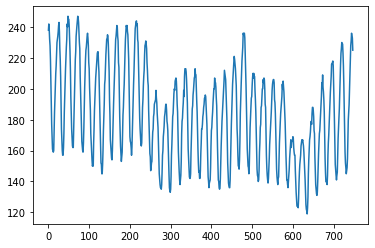

In [ ]:
plt.plot(d['13'])
plt.show()

In [ ]:
# generator function that creates equal chunk size of index range of the tasks
def split(tasks, n_chunk):
    p, q = divmod(len(tasks), n_chunk)
    return (tasks[i*p + min(i, q):(i+1)*p + min(i+1, q)] for i in range(n_chunk))

list(split(range(15),3))

[range(0, 5), range(5, 10), range(10, 15)]

In [ ]:
# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
start = now.strftime("%d-%m-%Y %H:%M:%S")
print(start)

30-06-2022 13:59:16


In [40]:
from sktime.forecasting.ets import AutoETS
import pandas as pd

series = [7,2,7,4,5,7,7,8,9,10]

model = AutoETS(auto=True)

model.fit(pd.Series(series))

gap = 3

horizon = 1

model.predict(gap+horizon)

13    11.3384
dtype: float64

In [66]:
model.predict([1,2,3,4])

10     9.666084
11    10.223522
12    10.780961
13    11.338400
dtype: float64

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                       ETS(AAN)   Log Likelihood                 -18.721
Date:                Fri, 08 Jul 2022   AIC                             47.443
Time:                        18:08:31   BIC                             48.956
Sample:                             0   HQIC                            45.783
                                 - 10   Scale                            2.475
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0001      0.543      0.000      1.000      -1.064       1.065
smoothing_trend  1.256e-06      0.575   2.18e-06      1.000      -1.127       1.127
initial_level       3.5343      4.311      0.820      0.412      -4.916      11.984
initial_trend       0.5574      0.246      2.268      0.023       0.076       1.039
===================================================================================
Ljung-Box (Q):                        5.18   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.07   Prob(JB):                         0.91
Heteroskedasticity (H):               0.05   Skew:                             0.12
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [44]:
a = model.summary()

In [62]:
c = str(a)

In [63]:
type(c)

str

In [64]:
d = {'summary': c}

d

{'summary': '                                 ETS Results                                  \n==============================================================================\nDep. Variable:                      y   No. Observations:                   10\nModel:                       ETS(AAN)   Log Likelihood                 -18.721\nDate:                Fri, 08 Jul 2022   AIC                             47.443\nTime:                        17:57:57   BIC                             48.956\nSample:                             0   HQIC                            45.783\n                                 - 10   Scale                            2.475\nCovariance Type:               approx                                         \n===================================================================================\n                      coef    std err          z      P>|z|      [0.025      0.975]\n-----------------------------------------------------------------------------------\nsmoothing_le

In [54]:
type(a)

statsmodels.iolib.summary.Summary

In [53]:
p = model.get_fitted_params()

p

{'aic': 47.4428069230757,
 'aicc': 62.4428069230757,
 'bic': 48.95573238804593,
 'hqic': 45.78313137555526}

In [ ]:
model.

# M4 Hourly dataset

In [63]:
import json
with open('datasets/m4_hourly_dataset.json') as file:
    d = json.load(file)

In [64]:

lens = []
min_len = 1000
for k, v in d.items():
    l = len(v)
    if l >= min_len:
        lens.append(l)

print(len(lens), np.mean(lens))

245 1008.0


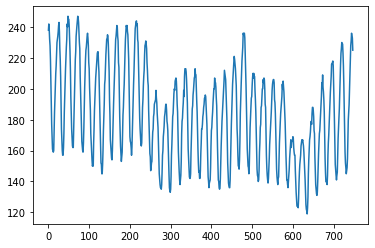

In [70]:
plt.plot(d['13'])
plt.show()

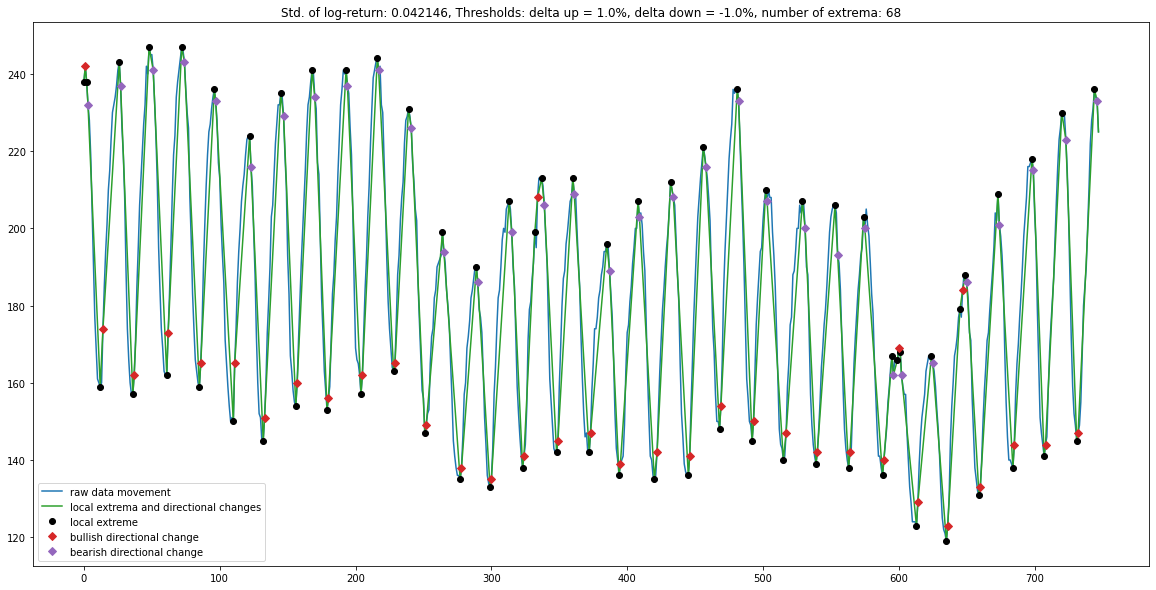

In [85]:
t7 = DCTransformer()
t7.transform(d['13'], threshold=(0.01, -0.01), kind='linear')
t7.make_plot(marks=True)

0.04214601057429671


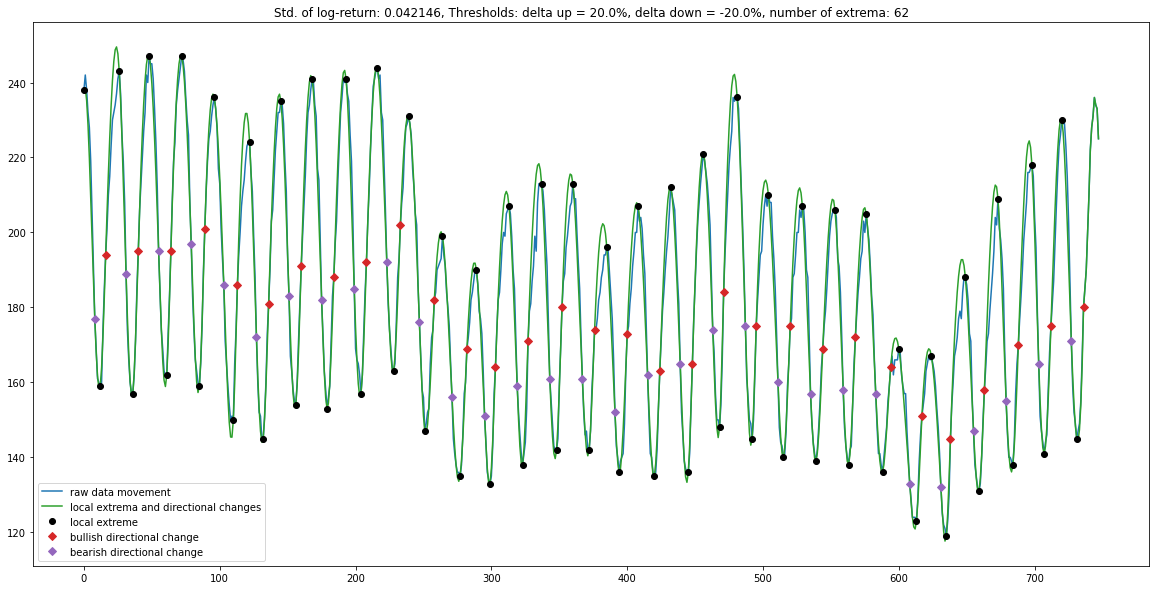

In [89]:
t8 = DCTransformer()
print(np.std(np.diff(np.log(d['13']))))
t8.transform(d['13'], threshold=(0.2, -0.2), kind='cubic')
t8.make_plot(marks=True)

# M4 Daily dataset

In [ ]:
df, frequency, forecast_horizon, missing_values, equal_len = data_prep.convert_tsf_to_dataframe('datasets/m4_daily_dataset.tsf')
df.head()

,series_name,start_timestamp,series_value
0,T1,1994-01-03 12:00:00,"[1017.1, 1019.3, 1017.0, 1019.2, 1018.7, 1015...."
1,T2,1995-01-02 12:00:00,"[2793.7, 2793.8, 2803.7, 2805.8, 2802.3, 2795...."
2,T3,2006-01-05 12:00:00,"[1091.3, 1088.5, 1085.7, 1082.9, 1080.1, 1077...."
3,T4,1996-05-30 12:00:00,"[1092.0, 1078.0, 1064.0, 1050.0, 1036.0, 1022...."
4,T5,1997-01-03 12:00:00,"[2938.63, 2956.44, 2964.41, 2972.41, 3014.97, ..."


In [ ]:
print(len(df), frequency, forecast_horizon, missing_values, equal_len)

4227 daily 14 False False


In [ ]:
arr = df.values
arr = arr.T
d = {i: list(a) for i, a in enumerate(arr[2])}

lens = []
min_len = 1000
for k, v in d.items():
    l = len(v)
    if l >= min_len:
        lens.append(l)

print(len(lens), np.mean(lens))

2663 3554.542996620353


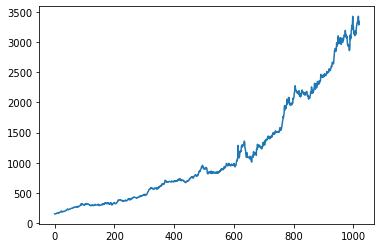

In [ ]:
plt.plot(d[5])
plt.show()

In [ ]:
import json

with open(f'datasets/m4_daily_dataset.json', 'x') as file:
    json.dump(d, file)

# M4 Weekly dataset

In [ ]:
df, frequency, forecast_horizon, missing_values, equal_len = data_prep.convert_tsf_to_dataframe('datasets/m4_weekly_dataset.tsf')
df.head()

,series_name,start_timestamp,series_value
0,T1,1975-01-08 12:00:00,"[1089.2, 1078.91, 1079.88, 1063.58, 1060.61, 1..."
1,T2,1984-01-04 12:00:00,"[195.928, 194.796, 192.71, 190.288, 188.77, 18..."
2,T3,1975-01-06 12:00:00,"[258.7, 259.8, 260.2, 260.8, 261.1, 263.1, 264..."
3,T4,1967-01-07 12:00:00,"[3460.0, 3340.0, 2770.0, 2520.0, 2740.0, 2760...."
4,T5,1986-02-08 12:00:00,"[4696.0, 4765.0, 4144.0, 3945.0, 4733.0, 4330...."


In [ ]:
print(len(df), frequency, forecast_horizon, missing_values, equal_len)

359 weekly 13 False False


In [ ]:
arr = df.values
arr = arr.T
d = {i: list(a) for i, a in enumerate(arr[2])}

lens = []
min_len = 1000
for k, v in d.items():
    l = len(v)
    if l >= min_len:
        lens.append(l)

print(len(lens), np.mean(lens))

168 1673.6666666666667


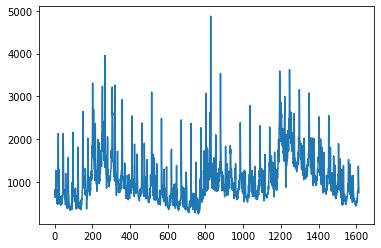

In [ ]:
plt.plot(d[5])
plt.show()

Dump the dictionary to a .JSON file.

In [ ]:
import json

with open(f'datasets/m4_weekly_dataset.json', 'x') as file:
    json.dump(d, file)

# M3 monthly dataset

In [ ]:
with open(f'datasets/m3_monthly_dataset.json', 'r') as file:
    d = json.load(file)

In [ ]:
lens = []
min_len = 130
max_len = 9999
for k, v in d.items():
    l = len(v)
    if l >= min_len and l <= max_len:
        lens.append(l)

print(len(lens), np.mean(lens))

799 137.13266583229037


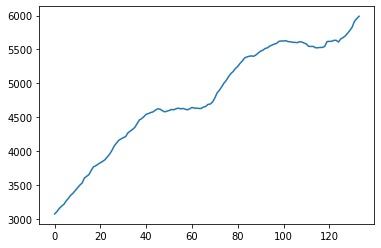

In [ ]:
plt.plot(d["822"])
plt.show()

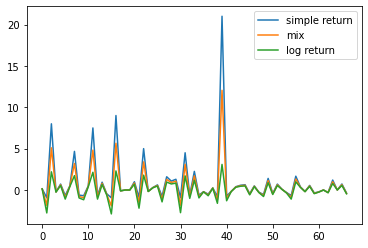

[1.1494989343464272, 3.1882663616451445, 2.0512705205256645]
[ 1.3213478  10.16504239  4.20771075]


In [73]:
def simple_return(ls):
    res = []
    for i, s in enumerate(ls):
        if i == 0: continue
        res.append((s - ls[i-1])/ls[i-1])
    return res

log_return = np.diff(np.log(ls))
simp_return = simple_return(ls)
mix = [np.mean([l, s]) for l, s in zip(log_return, simp_return)]


plt.plot(simp_return, label='simple return')
plt.plot(mix, label='mix')
plt.plot(log_return, label='log return')
plt.legend()
plt.show()
sigma = list(map(np.std, [log_return, simp_return, mix]))
print(sigma)
var = np.square(sigma)
print(var)

In [10]:
import json
import os
"""
# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
start = now.strftime("%d-%m-%Y_%H:%M:%S")

isExist = os.path.exists(f'{start}/')

if not isExist:
    os.mkdir(f'{start}/')

d1 = {'1': 1, '2': 2}

with open(f'{start}/d1.json', 'x') as file:
    json.dump(d1, file, indent=4)
"""

In [20]:
l1 = np.array([1, 2])
l2 = np.array([2, 4])
l3 = [0, 0]

import math
math.dist(l1, l2)

2.23606797749979

In [15]:
np.sqrt(5)

2.23606797749979

# validation, test demo

In [28]:
from pprint import pprint
import numpy as np
import data_prep
import random
ts = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
states = [3, 0, 1, 2, 10, -1, -2, -10]

n_val = 4
n_test = 4
n_lag = 4
h = 1
gap = 2

split = n_val + n_test

for i in range(n_val):
    train_v = ts[:-split+1+i]
    train = train_v[:-h-gap]
    val = train_v[-h:]
    ttrain = [t*0.9 for t in train] # transformation
    tstate = [random.choice(states) for _ in ttrain]
    ttrain = train
    tX, ty = data_prep.ts_prep(ttrain, nlag=n_lag, horizon=h, gap=gap)
    tstate_onehot = data_prep.one_hot(tstate[n_lag-1:-gap], states)
    tX_state = tstate_onehot[:-h]
    tvalx_state = tstate_onehot[-h].tolist()
    ttrainx, tvalx = tX, ttrain[-n_lag:]
    ttrainx, tvalx = np.append(tX, tX_state, axis=1), ttrain[-n_lag-gap:-gap] + tvalx_state
    ttrainy, valy = ty, val

    pprint(train_v)
    pprint(train)
    pprint(ttrain)
    # pprint(tstate_onehot)
    # pprint(tstate)
    pprint(ttrainx)
    pprint(ttrainy)
    pprint(tvalx)
    pprint(valy)
    # print(train)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
array([[1, 2, 3, 4, 0, 0, 1, 0, 0, 0, 0, 0],
       [2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 1, 0],
       [3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 1, 0],
       [4, 5, 6, 7, 0, 0, 0, 0, 0, 0, 1, 0],
       [5, 6, 7, 8, 0, 0, 0, 0, 1, 0, 0, 0],
       [6, 7, 8, 9, 0, 1, 0, 0, 0, 0, 0, 0]])
array([[ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])
[7, 8, 9, 10, 1, 0, 0, 0, 0, 0, 0, 0]
[15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
array([[ 1,  2,  3,  4,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  3,  4,  5,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  4,  5,  6,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  5,  6,  7,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  6,  7,  8,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 6,  7,  8,  9,  0,  0,  1,  0,  0,  0

In [25]:
for i in range(n_test):
    if i == n_test-h:
        train_v = ts
    else:
        train_v = ts[:-n_test+h+i]

    train = train_v[:-h-gap]
    val = train_v[-h:]

    ttrain = [t*0.9 for t in train] # transformation
    tX, ty = data_prep.ts_prep(ttrain, nlag=n_lag, horizon=h, gap=gap)
    ttrainx, ttestx = tX, ttrain[-n_lag:]
    ttrainy, testy = ty, val
    
    pprint(ttrain)
    pprint(ttrainx)
    pprint(ttrainy)
    pprint(ttestx)
    pprint(testy)
    print(train_v)

[0.9,
 1.8,
 2.7,
 3.6,
 4.5,
 5.4,
 6.3,
 7.2,
 8.1,
 9.0,
 9.9,
 10.8,
 11.700000000000001,
 12.6,
 13.5,
 14.4]
array([[ 0.9,  1.8,  2.7,  3.6],
       [ 1.8,  2.7,  3.6,  4.5],
       [ 2.7,  3.6,  4.5,  5.4],
       [ 3.6,  4.5,  5.4,  6.3],
       [ 4.5,  5.4,  6.3,  7.2],
       [ 5.4,  6.3,  7.2,  8.1],
       [ 6.3,  7.2,  8.1,  9. ],
       [ 7.2,  8.1,  9. ,  9.9],
       [ 8.1,  9. ,  9.9, 10.8],
       [ 9. ,  9.9, 10.8, 11.7]])
array([[ 6.3],
       [ 7.2],
       [ 8.1],
       [ 9. ],
       [ 9.9],
       [10.8],
       [11.7],
       [12.6],
       [13.5],
       [14.4]])
[11.700000000000001, 12.6, 13.5, 14.4]
[19]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.9,
 1.8,
 2.7,
 3.6,
 4.5,
 5.4,
 6.3,
 7.2,
 8.1,
 9.0,
 9.9,
 10.8,
 11.700000000000001,
 12.6,
 13.5,
 14.4,
 15.3]
array([[ 0.9,  1.8,  2.7,  3.6],
       [ 1.8,  2.7,  3.6,  4.5],
       [ 2.7,  3.6,  4.5,  5.4],
       [ 3.6,  4.5,  5.4,  6.3],
       [ 4.5,  5.4,  6.3,  7.2],
    

In [75]:
measure = {'SAPE': lambda y, y_hat: np.abs(y_hat-y)/np.mean((np.abs(y_hat), np.abs(y)))}

k = np.array([10])[0]
measure['SAPE'](9, k)

0.10526315789473684

In [58]:
from sklearn.linear_model import ElasticNet

ls = [1,2,3,4,5,6,7,1,2,3,3,4,5,3,4,6,3,4,5]

x, y = data_prep.ts_prep(ls, nlag=3, horizon=1)

en = ElasticNet()
en.fit(x, y)
en.predict([np.array([3,4,5])])[0]


4.059354838709677

In [59]:
[np.array([3,4,5])]

[array([3, 4, 5])]